# Задание
## Задать значения количества продаж по 10 товарам в течении 12 месяцев (помесячно). Для каждого из товаров спрогнозировать количество продаж на следующий, 13 месяц и провести анализ достоверности планирования продаж

In [1]:
import random
# Для удобной работы с массивами
import numpy as np
# Для представления данных в виде датафреймов
import pandas as pd
# Для рисования графиков
import matplotlib.pyplot as plt
# Для отключения предупреждений
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


class Product:
    def __init__(self, name, count=None):
        """
        Конструктор класса
        """
        self.name = name
        if count is not None:
            self.count = count
        else:
            min_rand = random.randint(100, 150)
            delt_rand = 20
            self.count = np.random.normal(min_rand, delt_rand, 12)

    def __str__(self):
        """
        Метод для конвертации в строку
        """
        return f'{self.name}: {[i for i in self.count]}'

    def __repr__(self):
        """
        Метод для представления в виде строки из дебаг-консоли
        """
        return f'{self.name}: {[i for i in self.count]}'

    def to_dict(self):
        """
        Возвращает класс в представлении словаря
        """
        return {
            self.name: self.count
        }

    def sum(self):
        """
        Возвращает общую стоимость за все месяца
        """
        return sum(self.count)

    def avg(self):
        """
        Возвращает среднюю цену
        """
        return round(sum(self.count) / len(self.count), 4)

    def msd(self):
        """
        Возвращает СКО для продукции
        """
        avg_value = self.avg()
        upper_value = sum([(v - avg_value) ** 2 for v in self.count])
        msd_square = upper_value / (len(self.count) - 1)
        return msd_square ** 0.5


In [2]:
products = [
    Product(name='Смартфон'),
    Product(name='Часы'),
    Product(name='Монитор'),
    Product(name='Наушники'),
    Product(name='Колонка'),
    Product(name='Камера'),
    Product(name='Принтер'),
    Product(name='Игровая приставка'),
    Product(name='Клавиатура'),
    Product(name='Видеокарта')
]

products

[Смартфон: [107.7975376328739, 114.30069256238663, 88.96966303124007, 97.52168130786336, 108.58370962630686, 92.7905537385482, 154.22249435845356, 136.3318360386703, 148.84977355000387, 109.69046709167563, 106.18119353936999, 100.61443617897096],
 Часы: [108.82839269497705, 147.89736681458513, 100.03905111017365, 113.32434364146103, 79.65591201431525, 113.31147928433005, 116.87142246801939, 98.2331321837287, 127.53303180260508, 109.33324282619236, 94.76475721376409, 106.27757009777689],
 Монитор: [111.51745390231288, 112.33620787433145, 130.17868977263635, 101.44267817506653, 111.33916241803682, 154.1457054375556, 121.53863967783379, 110.61946596843075, 88.89104479637376, 112.98586666666228, 123.76190174876533, 89.52149058444175],
 Наушники: [91.75309091207805, 81.21709046202244, 132.6103981232436, 116.03000045735021, 141.40974506233283, 116.6021600153522, 99.9875997836876, 127.92130511605312, 132.21361373550477, 125.30969225019588, 103.64651920898568, 107.26573823634851],
 Колонка: [1

In [3]:
def convert_list_products_to_dict(p_list: list):
    """
    Конвертирует лист продуктов в словарь для визуализации в датафрейме
    """
    result = {}
    for p in p_list:
        result[p.name] = p.count
    return result

In [4]:
df = pd.DataFrame(convert_list_products_to_dict(products))
df

,Смартфон,Часы,Монитор,Наушники,Колонка,Камера,Принтер,Игровая приставка,Клавиатура,Видеокарта
0,107.797538,108.828393,111.517454,91.753091,105.888442,141.286059,160.863102,100.653641,109.348079,113.832060
1,114.300693,147.897367,112.336208,81.217090,80.014152,118.419907,151.666494,135.581925,86.514337,120.532220
2,88.969663,100.039051,130.178690,132.610398,91.674800,91.543693,151.672429,142.003629,82.207643,152.231935
3,97.521681,113.324344,101.442678,116.030000,89.726388,67.754344,110.703364,78.407494,72.594437,135.936610
4,108.583710,79.655912,111.339162,141.409745,109.501133,84.092554,101.506653,125.012368,109.298959,138.391197
5,92.790554,113.311479,154.145705,116.602160,116.295712,94.605159,173.315840,109.304726,108.571836,100.521924
6,154.222494,116.871422,121.538640,99.987600,117.003092,117.637874,118.282098,136.870125,109.417633,115.394561
7,136.331836,98.233132,110.619466,127.921305,113.309305,83.859146,150.001348,97.445316,111.635821,119.075770
8,148.849774,127.533032,88.891045,132.213614,109.118592,147.543864,159.289163,90.860107,57.024327,81.339770
9,109.690467,109.333243,112.985867,125.309692,111.721195,78.975491,161.328173,113.776524,101.372978,112.272967


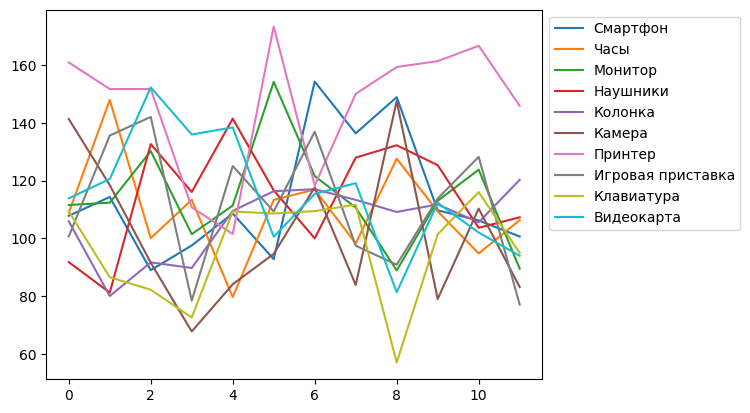

In [5]:
for product in products:
    plt.plot([i for i in range(12)], product.count, label=product.name)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Вычисляем оценку тренда (среднее арифметическое величины)

In [6]:
p0 = [product.avg() for product in products]
[f'{p.name}: {p_avg}' for p_avg, p in zip(p0, products)]

['Смартфон: 113.8212',
 'Часы: 109.6725',
 'Монитор: 114.0232',
 'Наушники: 114.6639',
 'Колонка: 105.8349',
 'Камера: 101.5951',
 'Принтер: 145.9273',
 'Игровая приставка: 111.2637',
 'Клавиатура: 96.5778',
 'Видеокарта: 115.457']

# Вычисляем оценку среднеквадратичного отклонения

In [7]:
msd_products = [product.msd() for product in products]
[f'{product.name}: {msd_value}' for msd_value, product in zip(msd_products, products)]

['Смартфон: 21.33148027442298',
 'Часы: 17.103411782511806',
 'Монитор: 17.687587291184247',
 'Наушники: 18.27872023301185',
 'Колонка: 12.369112499450388',
 'Камера: 25.353911148873852',
 'Принтер: 23.116768205045965',
 'Игровая приставка: 22.65535053030387',
 'Клавиатура: 18.364525568905574',
 'Видеокарта: 19.95421403892538']

# Прогнозируем количество продаж на следующий, 13 месяц

In [8]:
predict_values = p0 + np.random.normal(0, msd_products, len(msd_products))
predict_values

array([140.95869555, 101.18535081, 104.16311803, 122.12752784,
       117.03441841,  75.34356682, 146.41389122, 123.039648  ,
        76.90969946,  82.02308379])

In [9]:
for product, predict_value in zip(products, predict_values):
    product.count = np.append(product.count, predict_value)
products

[Смартфон: [107.7975376328739, 114.30069256238663, 88.96966303124007, 97.52168130786336, 108.58370962630686, 92.7905537385482, 154.22249435845356, 136.3318360386703, 148.84977355000387, 109.69046709167563, 106.18119353936999, 100.61443617897096, 140.95869555281433],
 Часы: [108.82839269497705, 147.89736681458513, 100.03905111017365, 113.32434364146103, 79.65591201431525, 113.31147928433005, 116.87142246801939, 98.2331321837287, 127.53303180260508, 109.33324282619236, 94.76475721376409, 106.27757009777689, 101.18535081156556],
 Монитор: [111.51745390231288, 112.33620787433145, 130.17868977263635, 101.44267817506653, 111.33916241803682, 154.1457054375556, 121.53863967783379, 110.61946596843075, 88.89104479637376, 112.98586666666228, 123.76190174876533, 89.52149058444175, 104.16311802934753],
 Наушники: [91.75309091207805, 81.21709046202244, 132.6103981232436, 116.03000045735021, 141.40974506233283, 116.6021600153522, 99.9875997836876, 127.92130511605312, 132.21361373550477, 125.309692250

In [10]:
df = pd.DataFrame(convert_list_products_to_dict(products))
df

,Смартфон,Часы,Монитор,Наушники,Колонка,Камера,Принтер,Игровая приставка,Клавиатура,Видеокарта
0,107.797538,108.828393,111.517454,91.753091,105.888442,141.286059,160.863102,100.653641,109.348079,113.832060
1,114.300693,147.897367,112.336208,81.217090,80.014152,118.419907,151.666494,135.581925,86.514337,120.532220
2,88.969663,100.039051,130.178690,132.610398,91.674800,91.543693,151.672429,142.003629,82.207643,152.231935
3,97.521681,113.324344,101.442678,116.030000,89.726388,67.754344,110.703364,78.407494,72.594437,135.936610
4,108.583710,79.655912,111.339162,141.409745,109.501133,84.092554,101.506653,125.012368,109.298959,138.391197
5,92.790554,113.311479,154.145705,116.602160,116.295712,94.605159,173.315840,109.304726,108.571836,100.521924
6,154.222494,116.871422,121.538640,99.987600,117.003092,117.637874,118.282098,136.870125,109.417633,115.394561
7,136.331836,98.233132,110.619466,127.921305,113.309305,83.859146,150.001348,97.445316,111.635821,119.075770
8,148.849774,127.533032,88.891045,132.213614,109.118592,147.543864,159.289163,90.860107,57.024327,81.339770
9,109.690467,109.333243,112.985867,125.309692,111.721195,78.975491,161.328173,113.776524,101.372978,112.272967


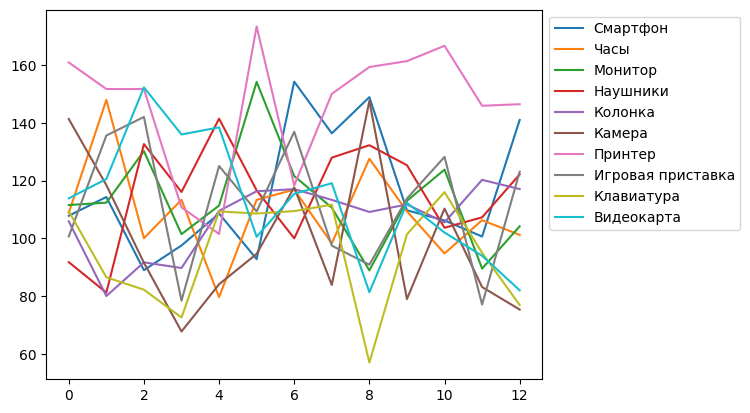

In [11]:
for product in products:
    plt.plot([i for i in range(13)], product.count, label=product.name)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Анализ достоверности планирования продаж

### Расчитаем достоверность прогноза

In [12]:
reliability = [msd_value / p0_value for msd_value, p0_value in zip(msd_products, p0)]
[f'{product.name}: {reliability_value}' for product, reliability_value in zip(products, reliability)]

['Смартфон: 0.18741218924438485',
 'Часы: 0.15594986694487503',
 'Монитор: 0.15512270565274652',
 'Наушники: 0.15941129015332506',
 'Колонка: 0.11687177386146146',
 'Камера: 0.24955840536476515',
 'Принтер: 0.15841290975058103',
 'Игровая приставка: 0.20361852545173198',
 'Клавиатура: 0.1901526600202694',
 'Видеокарта: 0.1728281008420917']

### Первое условие
#### Величины $ {X_i} $ лежат близко к своему среднему значению. Это условие означает, что продажи стабильные
#### $ X_i - \hat{p_0} < 2\hat{\sigma} $ для всех $ i $

In [13]:
p0_np = np.array(p0)
msd_np = np.array(msd_products)
products_df = pd.DataFrame(convert_list_products_to_dict(products))

condition_one = products_df - p0_np < (2 * msd_np)
condition_one

,Смартфон,Часы,Монитор,Наушники,Колонка,Камера,Принтер,Игровая приставка,Клавиатура,Видеокарта
0,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
5,True,True,False,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True


In [14]:
condition_one.all()

Смартфон              True
Часы                 False
Монитор              False
Наушники              True
Колонка               True
Камера                True
Принтер               True
Игровая приставка     True
Клавиатура            True
Видеокарта            True
dtype: bool

### Второе условие
#### Экстраполируемые значения $ X_i $ с большей степенью достоверности не равны 0. Это условие означает, что период для прогноза не слишком велик
#### $ \hat{p_0} > 2\hat{\sigma} $

In [15]:
condition_two = p0_np > (2 * msd_np)
condition_two

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [16]:
[f'{product.name}: {condition_value}' for product, condition_value in zip(products, condition_two)]

['Смартфон: True',
 'Часы: True',
 'Монитор: True',
 'Наушники: True',
 'Колонка: True',
 'Камера: True',
 'Принтер: True',
 'Игровая приставка: True',
 'Клавиатура: True',
 'Видеокарта: True']

### Третье условие
#### Среди $ X_i $ не встречаются нулевые значения. Это условие означает, что периодичность анализа данных выбрана правильно
#### $ X_i > 0 $ для всех $ i $

In [17]:
condition_three = products_df > 0
condition_three

,Смартфон,Часы,Монитор,Наушники,Колонка,Камера,Принтер,Игровая приставка,Клавиатура,Видеокарта
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True


In [18]:
condition_three.all()

Смартфон             True
Часы                 True
Монитор              True
Наушники             True
Колонка              True
Камера               True
Принтер              True
Игровая приставка    True
Клавиатура           True
Видеокарта           True
dtype: bool

### Составим таблицу для визуализации достоверности планирования

In [19]:
def get_color_by_condition(c1, c2, c3):
    """
    Получение уровня достоверности по условиям
    """
    if c1 and c2 and c3:
        return "Зеленый"
    elif (not c1 and c2 and c3) or (c1 and not c2 and c3):
        return "Желтый"
    elif not c1 and not c2 and c3:
        return "Оранжевый"
    else:
        return "Красный"

In [20]:
table_header = ["Товар", "Уровень достоверности", "Условие 1", "Условие 2", "Условие 3"]
table = pd.DataFrame(columns=table_header)

condition_one_result = condition_one.all()
condition_two_result = condition_two
condition_three_result = condition_three.all()

for i in range(len(products)):
    table = table.append({
        "Товар": products[i].name,
        "Уровень достоверности": get_color_by_condition(condition_one_result[i], condition_two_result[i], condition_three_result[i]),
        "Условие 1": condition_one_result[i],
        "Условие 2": condition_two_result[i],
        "Условие 3": condition_three_result[i]
    }, ignore_index=True)

table

,Товар,Уровень достоверности,Условие 1,Условие 2,Условие 3
0,Смартфон,Зеленый,True,True,True
1,Часы,Желтый,False,True,True
2,Монитор,Желтый,False,True,True
3,Наушники,Зеленый,True,True,True
4,Колонка,Зеленый,True,True,True
5,Камера,Зеленый,True,True,True
6,Принтер,Зеленый,True,True,True
7,Игровая приставка,Зеленый,True,True,True
8,Клавиатура,Зеленый,True,True,True
9,Видеокарта,Зеленый,True,True,True
